In [1]:
import pandas as pd
import numpy as np
import json
import os
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
sns.set_palette("colorblind")

In [3]:
def ns_to_ms(ns):
  return ns / 1_000_000

## Data Loading

In [4]:
pwd = "."
figs_dir = "./figs"
!mkdir -p figs

In [5]:
def read_json(path):
  fp = open(path, 'r')
  nb_stats = json.load(fp)
  fp.close()
  return nb_stats

In [6]:
filepath = "roopahegde_cryptocurrency-price-correlation"

modin_path = "../../../stats/modin_256MB/" + filepath + ".json"
pandas_path = "../../../stats/pandas_256MB/" + filepath + ".json"

modin_stats = read_json(modin_path)
pandas_stats = read_json(pandas_path)

assert len(modin_stats['cells']) == len(pandas_stats['cells'])
d = {'Code': [], 'Pandas Time': [], 'Modin Time': []}
for i in range(len(pandas_stats['cells'])):
  pd_cell = pandas_stats['cells'][i]
  modin_cell = modin_stats['cells'][i]
  # The cell that imports is different for the pandas and modin versions
  if "import pandas" not in pd_cell['raw']:
    assert pd_cell['raw'] == modin_cell['raw']
  d['Code'].append(pd_cell['raw'])
  d['Pandas Time'].append(ns_to_ms(pd_cell['total-ns']))
  d['Modin Time'].append(ns_to_ms(modin_cell['total-ns']))

In [7]:
df = pd.DataFrame(d)

## Stats

In [8]:
abs_diff = df['Pandas Time'] - df['Modin Time']
rel_diff = df['Pandas Time'] / df['Modin Time']

In [9]:
abs_diff[abs_diff > 200]

9    10556.599401
dtype: float64

In [10]:
rel_diff[rel_diff > 1.1]

9     116.128015
10      3.571899
dtype: float64

<AxesSubplot:xlabel='Notebook index', ylabel='Time (ms)'>

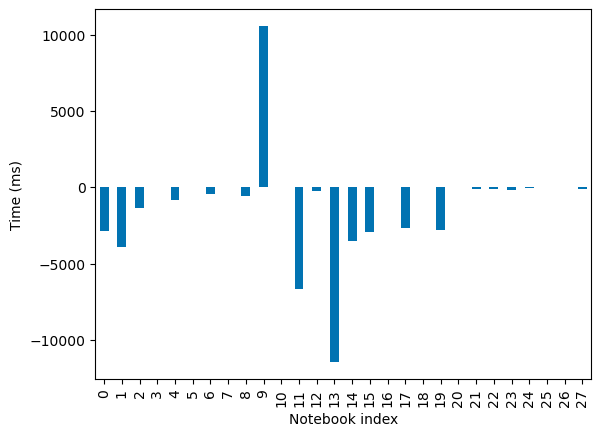

In [11]:
abs_diff.plot(kind='bar', xlabel='Notebook index', ylabel="Time (ms)")

In [14]:
# If we want to check the code of a notebook
print(12)
print(df.iloc[11]['Code'])
print(14)
print(df.iloc[13]['Code'])
print(15)
print(df.iloc[14]['Code'])
print(16)
print(df.iloc[15]['Code'])
print(18)
print(df.iloc[17]['Code'])
print(20)
print(df.iloc[19]['Code'])


12
#get all the records in bitcoin dataset but not in ethereum dataset
btc_master[~(btc_master['Date'].isin(eth_master["Date"]))]
14
#get all the records in litecoin dataset but not in bitcoin dataset
ltc_master[~(ltc_master['Date'].isin(btc_master["Date"]))].count()
15
#get all the records in litecoin dataset but not in ethereum dataset
ltc_master[~(ltc_master['Date'].isin(eth_master["Date"]))].count()
16
#Loose the time information
btc_master['Date'] = btc_master['Date'].dt.date

#Aggregate by date
btc_grouped = pd.pivot_table(btc_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})

btc_grouped.head()
18
#Loose the time information
eth_master['Date'] = eth_master['Date'].dt.date

#Aggregate by date
eth_grouped = pd.pivot_table(eth_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})
eth_grouped.hea